In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from dataset import *

import matplotlib.ticker as ticker

/home/alecx/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


# Helper functions and variable definitions

In [2]:
dims = [16, 32, 64, 128, 256, 512]
widths = [32, 64, 128, 256, 512, 1024, 2048]
activations = ["relu", "elu", "gelu", "leaky-relu", "quadratic"]
ranks = [1, 2, 4, 8, 16, 32, 64]
K = 2
angle = 90

In [3]:
activations_save = {
    "relu": "ReLU",
    "elu": "ELU",
    "gelu": "GELU",
    "leaky-relu": "Leaky ReLU",
    "quadratic": "Quadratic",
}

# Plot training and test accuracies vs. width

## Accuracy vs. width for different activation functions and data dimensions

In [4]:
# Load in saved results
train_accs = np.zeros((len(dims), len(widths), len(activations)))
test_accs = np.zeros((len(dims), len(widths), len(activations)))

for (k, dim) in enumerate(dims):
    for (i, width) in enumerate(widths):
        for (j, activation) in enumerate(activations):
            results_dir = "save/hybrid/data_dims/width_" + str(width) + "_depth_2_nonlinear_depth_1_gaussian_init_uos_data_dim_" + str(dim) + "_" + str(K) + "_classes_rank_4_angle_" + str(angle) + "_" + activation + "_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, "test.pth"), map_location=torch.device('cpu'))
        
            cur_train_accs = train_best_result['train_accuracies']
            train_accs[k, i, j] = cur_train_accs[-1]
        
            test_accs[k, i, j] = test_result['test_accuracy']

/tmp/ipykernel_2561019/2714619896.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xtick_labels)
/tmp/ipykernel_2561019/2714619896.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels)


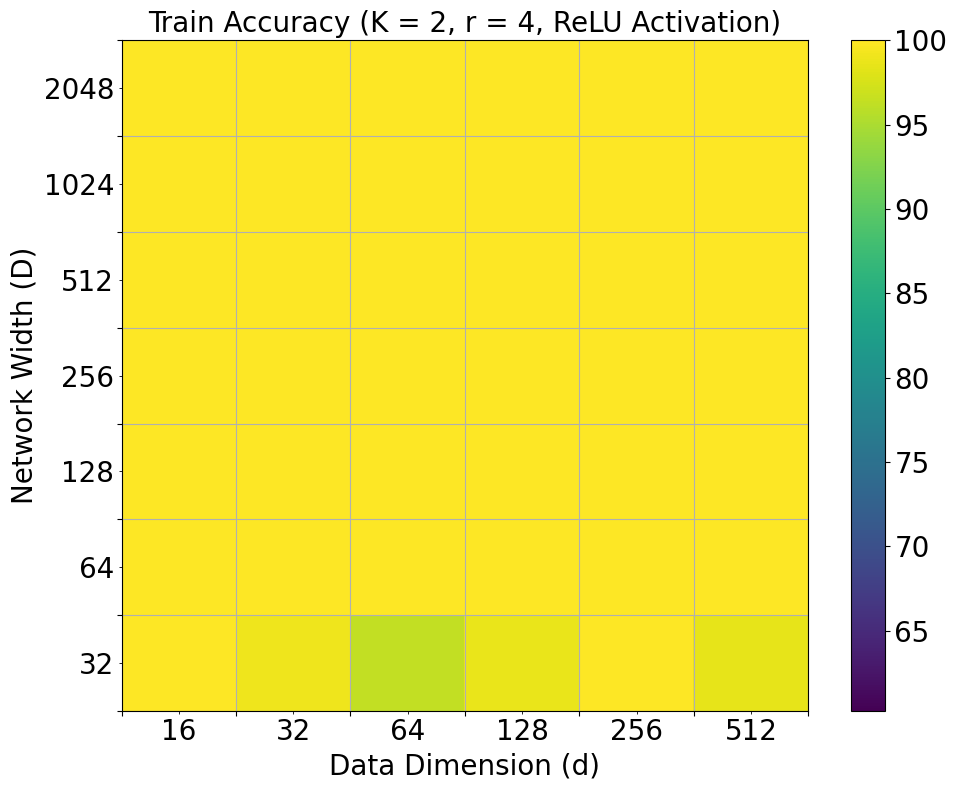

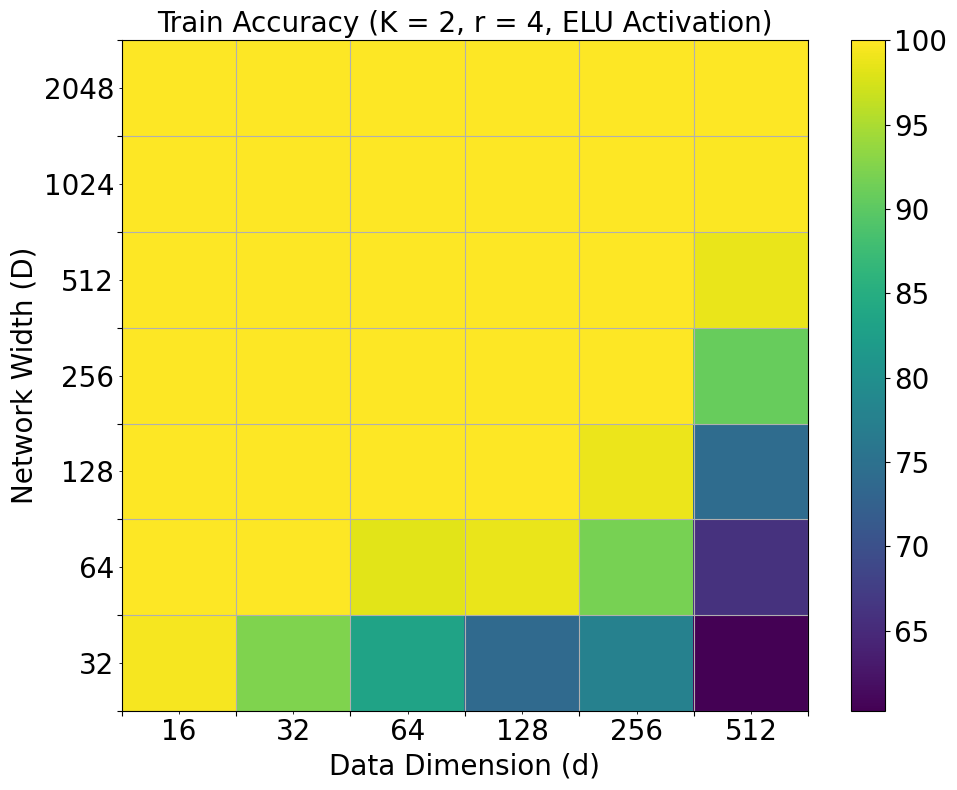

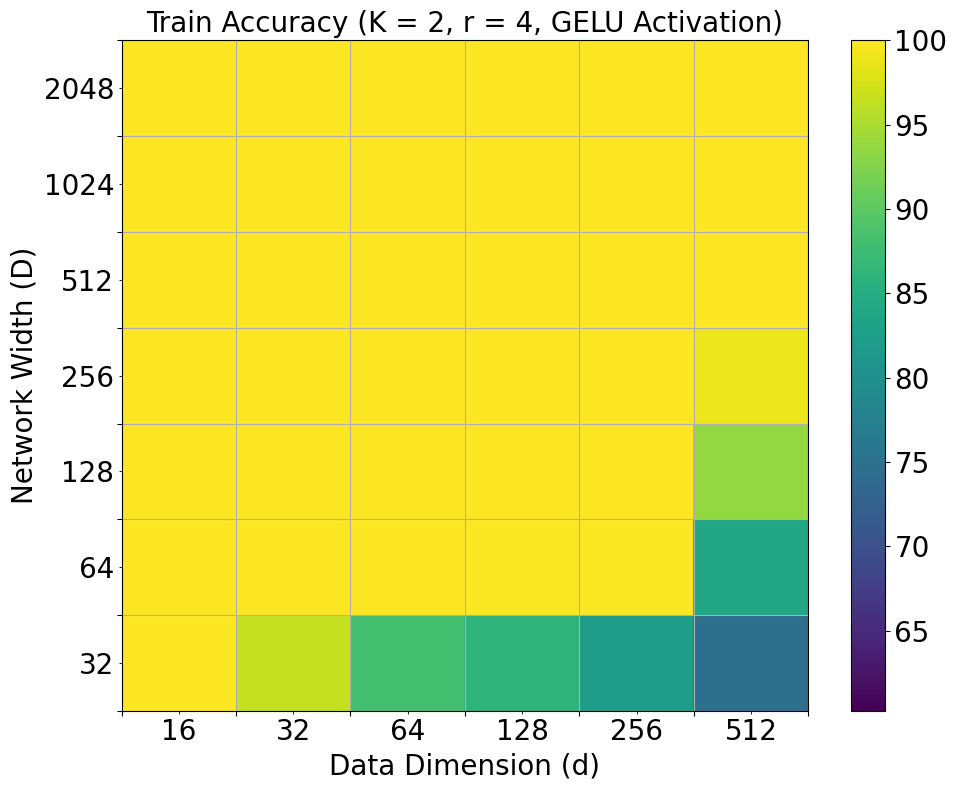

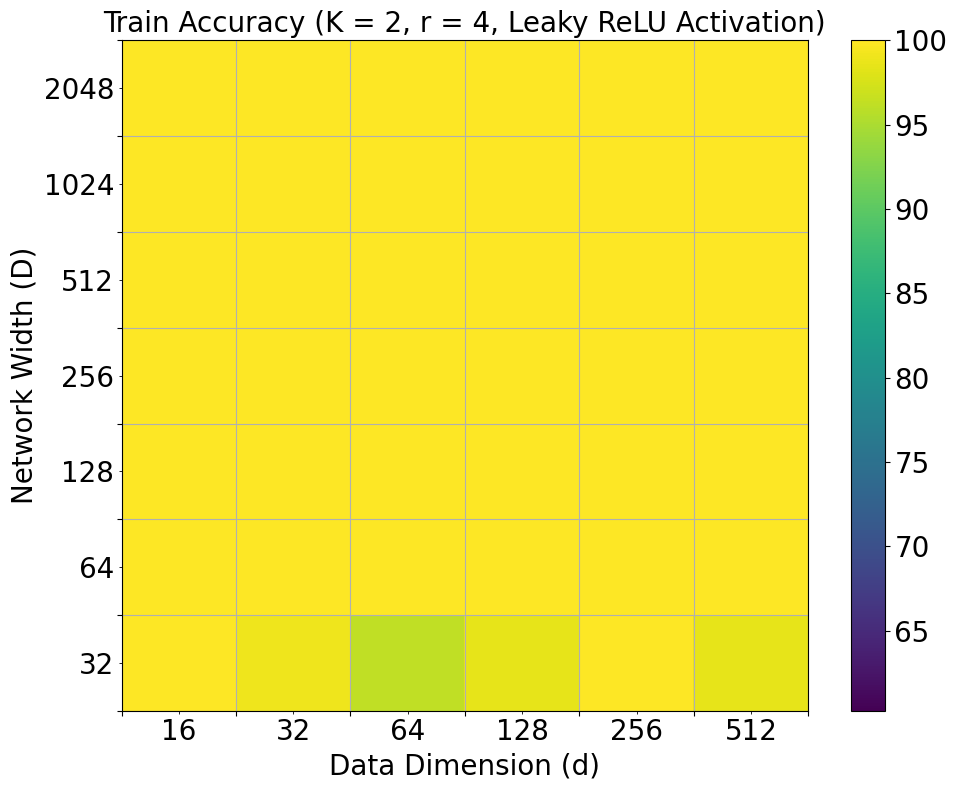

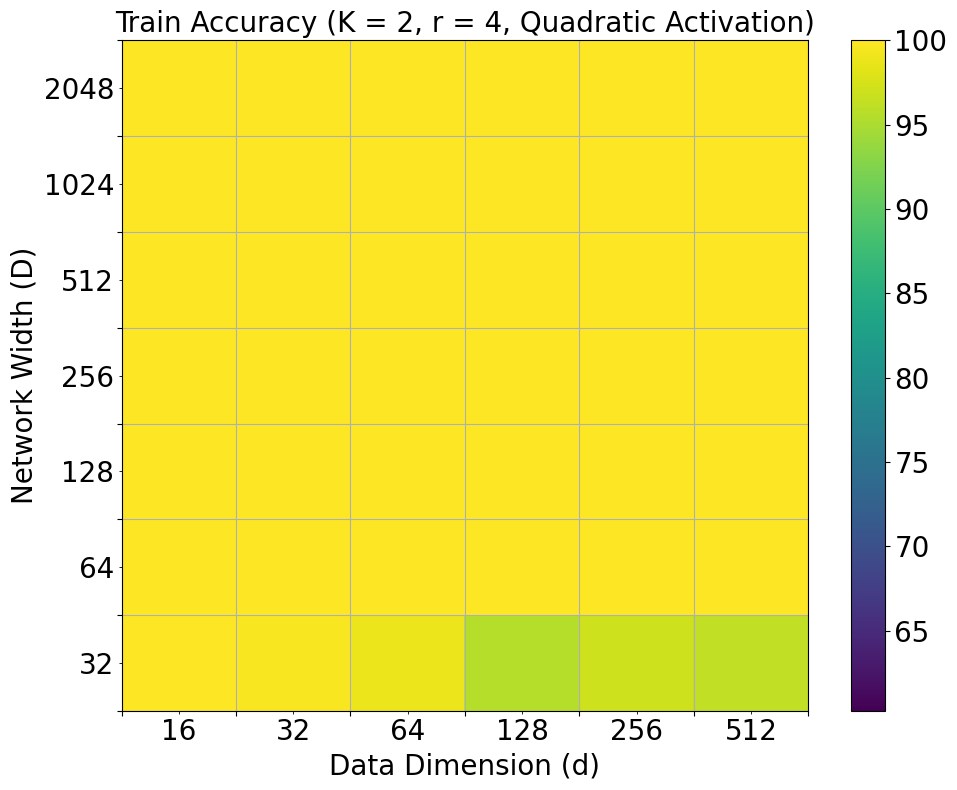

In [7]:
for (i, activation) in enumerate(activations):
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    start_idx = 1
    lw = 6
    ax1.set_xlabel(r'Data Dimension (d)', fontsize=20)
    ax1.set_ylabel('Network Width (D)', fontsize=20)
    ax1.set_title('Train Accuracy (K = ' + str(K) + ', r = 4, ' + activations_save[activation] + ' Activation)', fontsize=20)
    
    mesh = ax1.pcolor(train_accs[..., i].T, vmin=np.min(train_accs), vmax=np.max(train_accs))
    cbar = fig.colorbar(mesh)
    cbar.ax.tick_params(labelsize=20)
    
    xtick_labels = [str(dim) for dim in dims]
    ax1.set_xticklabels(xtick_labels)
    ax1.xaxis.set_major_formatter(ticker.NullFormatter())
    ax1.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5]))
    ax1.xaxis.set_minor_formatter(ticker.FixedFormatter(xtick_labels))
    
    ytick_labels = [str(width) for width in widths]
    ax1.set_yticklabels(ytick_labels)
    ax1.yaxis.set_major_formatter(ticker.NullFormatter())
    ax1.yaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
    ax1.yaxis.set_minor_formatter(ticker.FixedFormatter(ytick_labels))
    
    ax1.tick_params(which='minor', labelsize=20)
    
    plt.grid()
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

/tmp/ipykernel_2561019/3523507461.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xtick_labels)
/tmp/ipykernel_2561019/3523507461.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels)


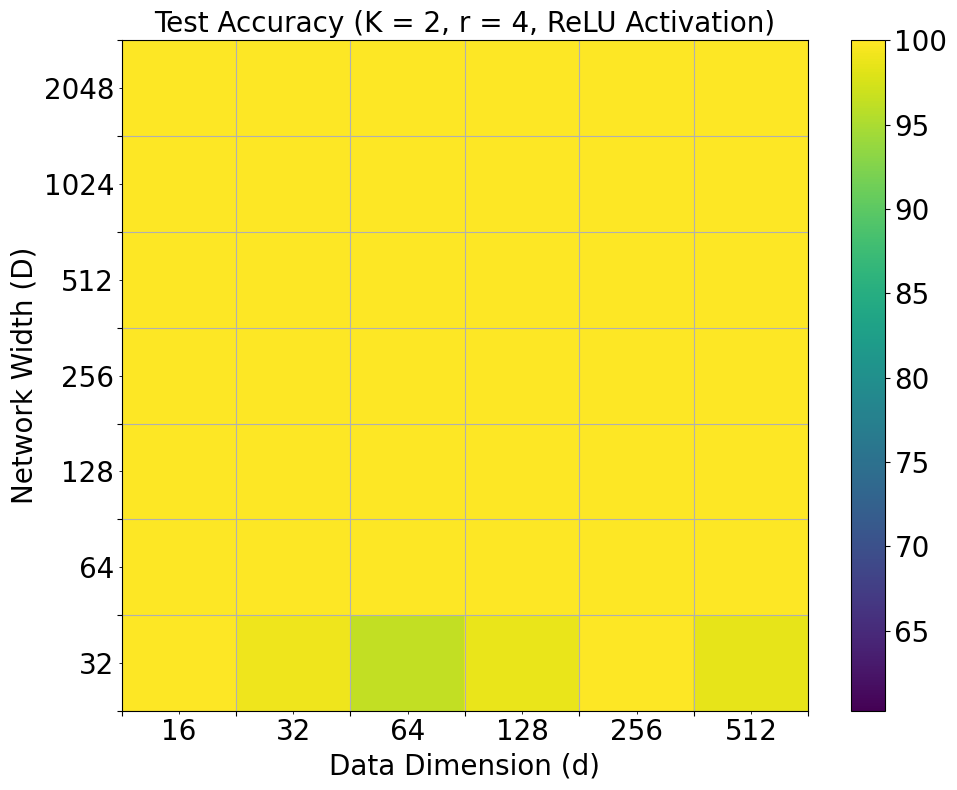

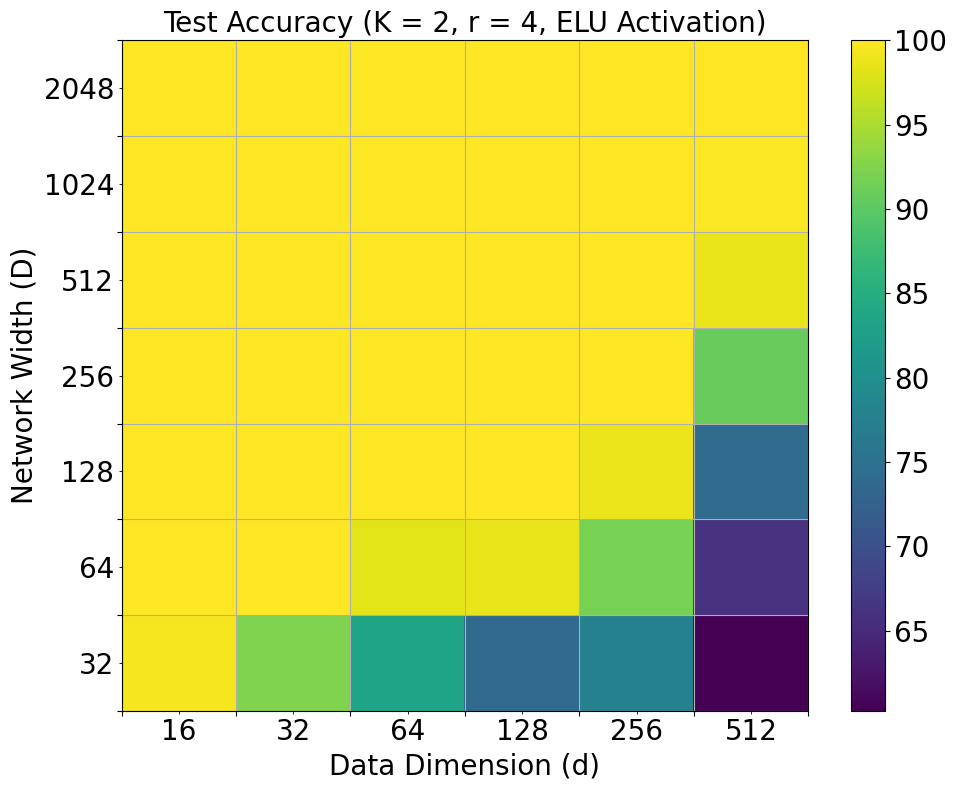

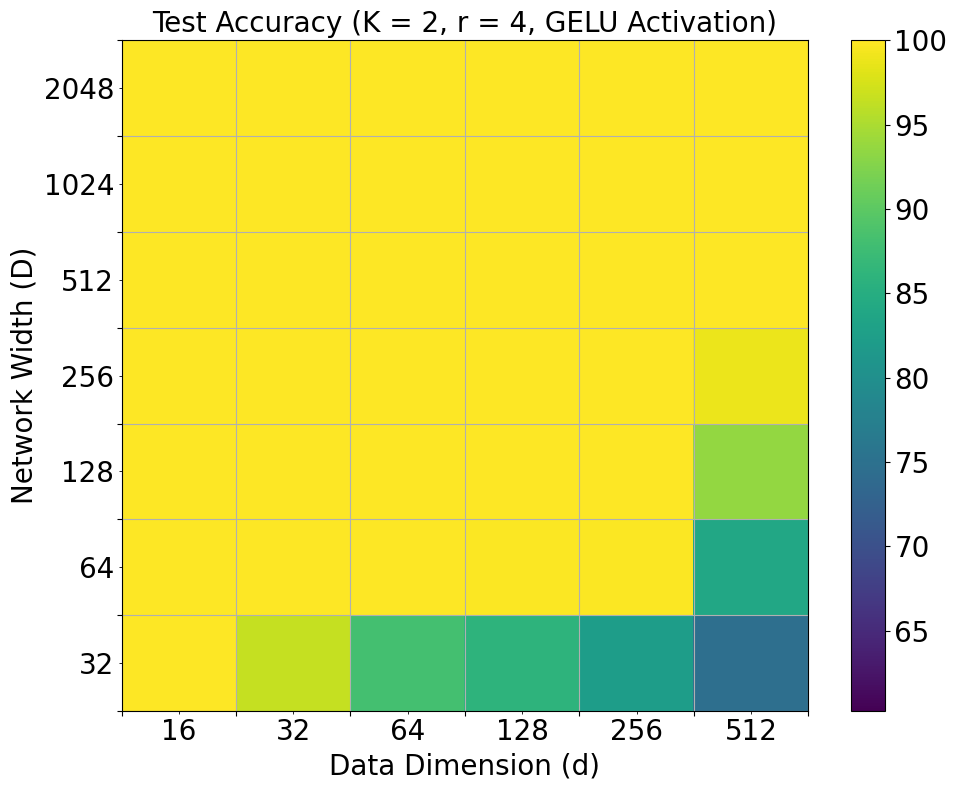

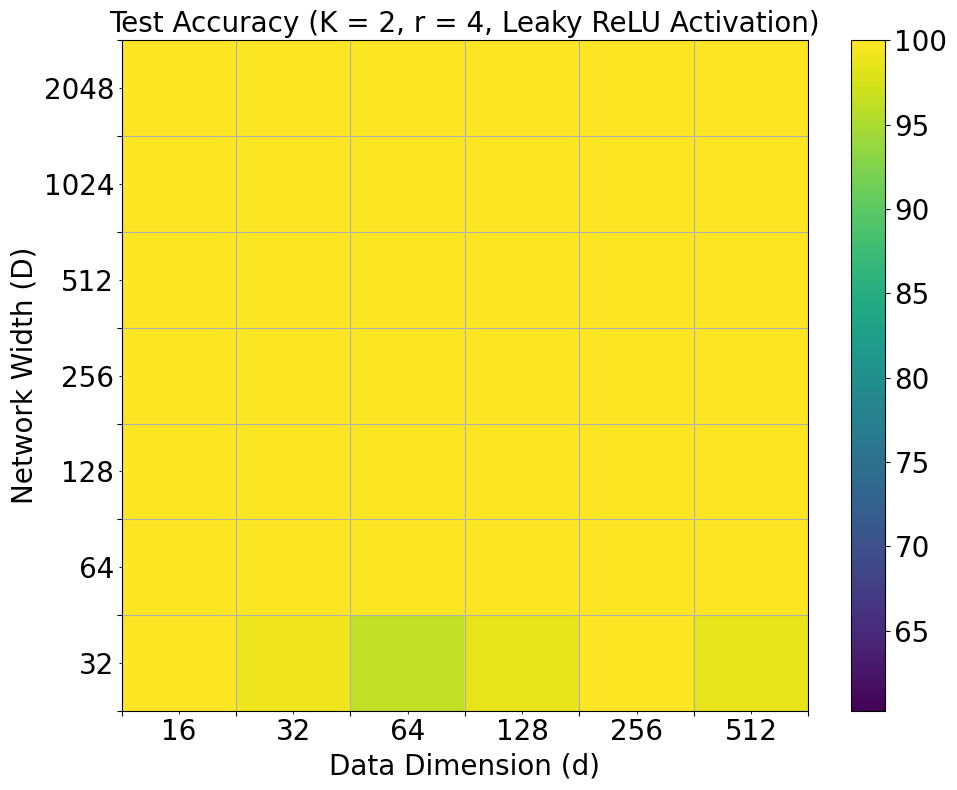

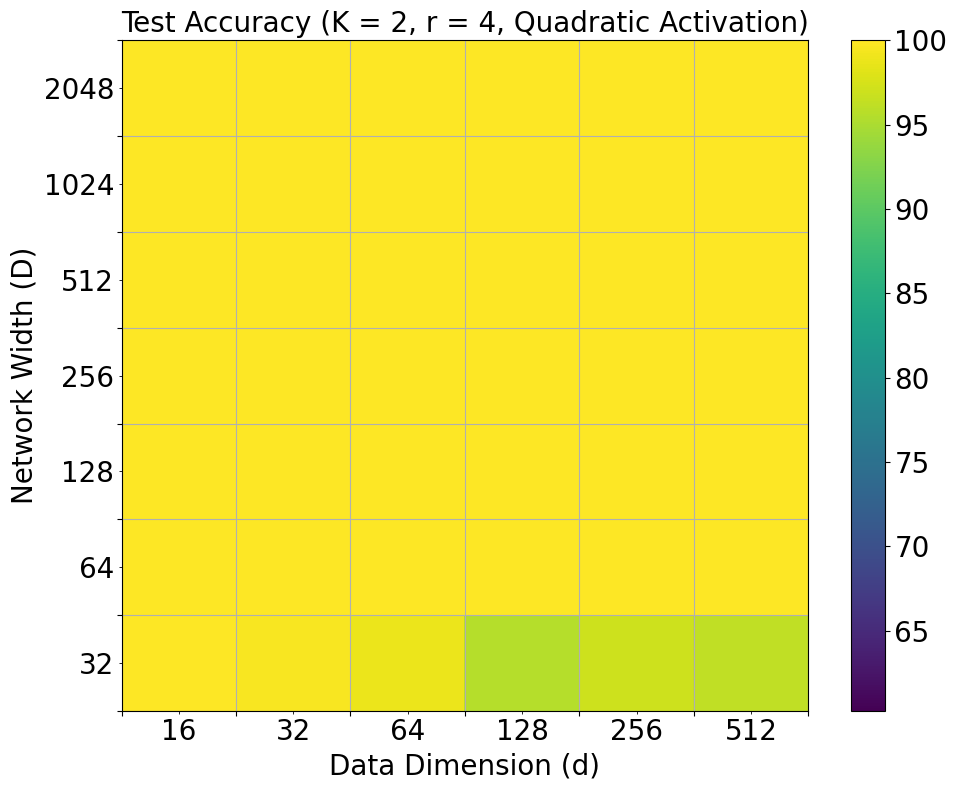

In [8]:
for (i, activation) in enumerate(activations):
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    start_idx = 1
    lw = 6
    ax1.set_xlabel(r'Data Dimension (d)', fontsize=20)
    ax1.set_ylabel('Network Width (D)', fontsize=20)
    ax1.set_title('Test Accuracy (K = ' + str(K) + ', r = 4, ' + activations_save[activation] + ' Activation)', fontsize=20)
    
    mesh = ax1.pcolor(test_accs[..., i].T, vmin=np.min(test_accs), vmax=np.max(test_accs))
    cbar = fig.colorbar(mesh)
    cbar.ax.tick_params(labelsize=20)
    
    xtick_labels = [str(dim) for dim in dims]
    ax1.set_xticklabels(xtick_labels)
    ax1.xaxis.set_major_formatter(ticker.NullFormatter())
    ax1.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5]))
    ax1.xaxis.set_minor_formatter(ticker.FixedFormatter(xtick_labels))
    
    ytick_labels = [str(width) for width in widths]
    ax1.set_yticklabels(ytick_labels)
    ax1.yaxis.set_major_formatter(ticker.NullFormatter())
    ax1.yaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
    ax1.yaxis.set_minor_formatter(ticker.FixedFormatter(ytick_labels))
    
    ax1.tick_params(which='minor', labelsize=20)
    
    plt.grid()
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

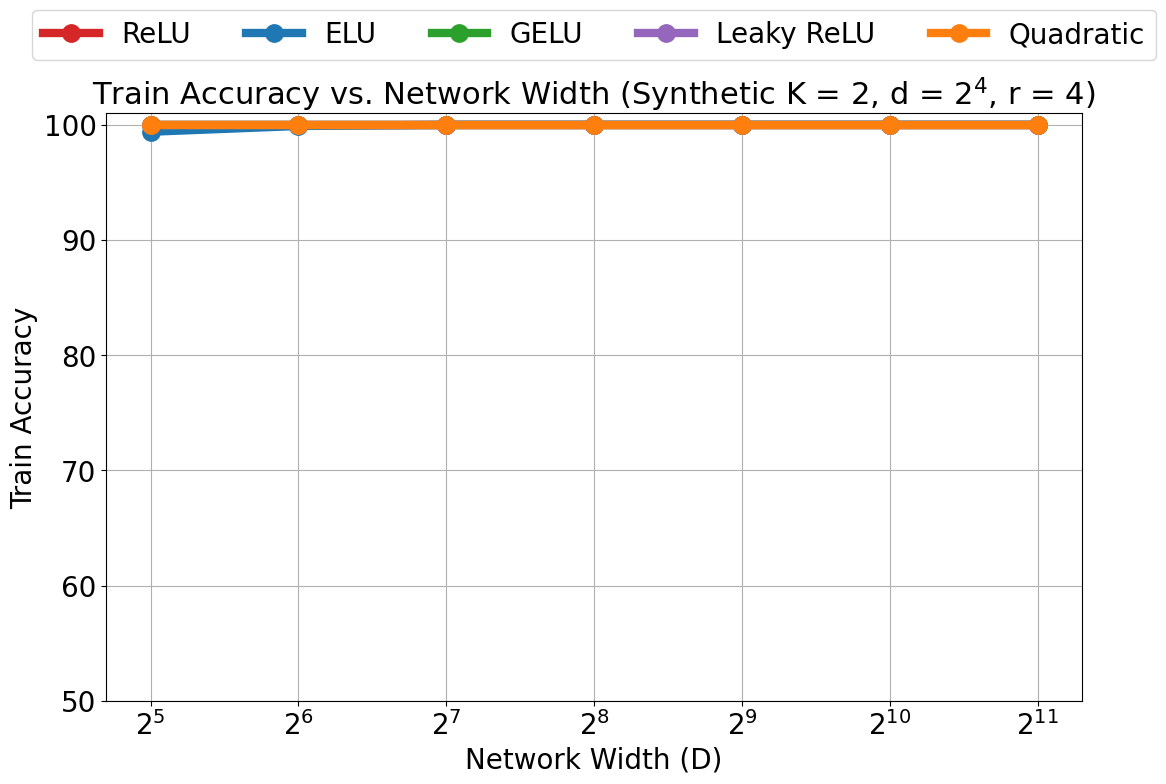

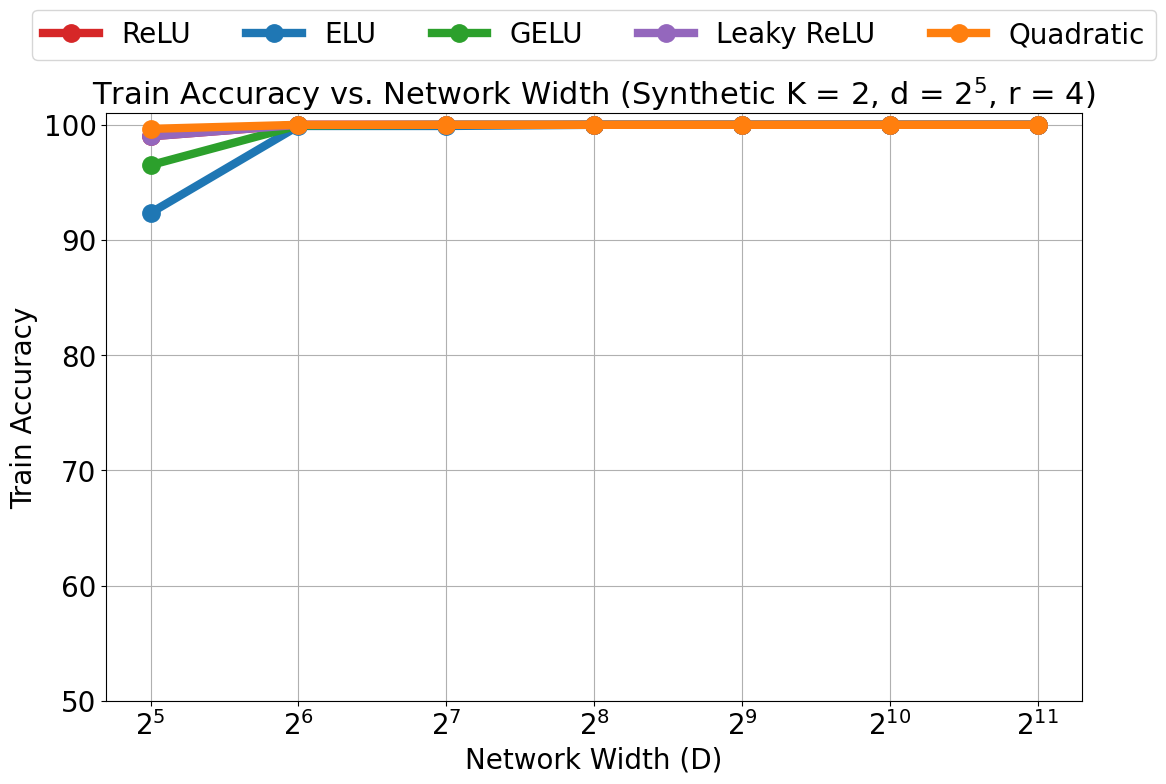

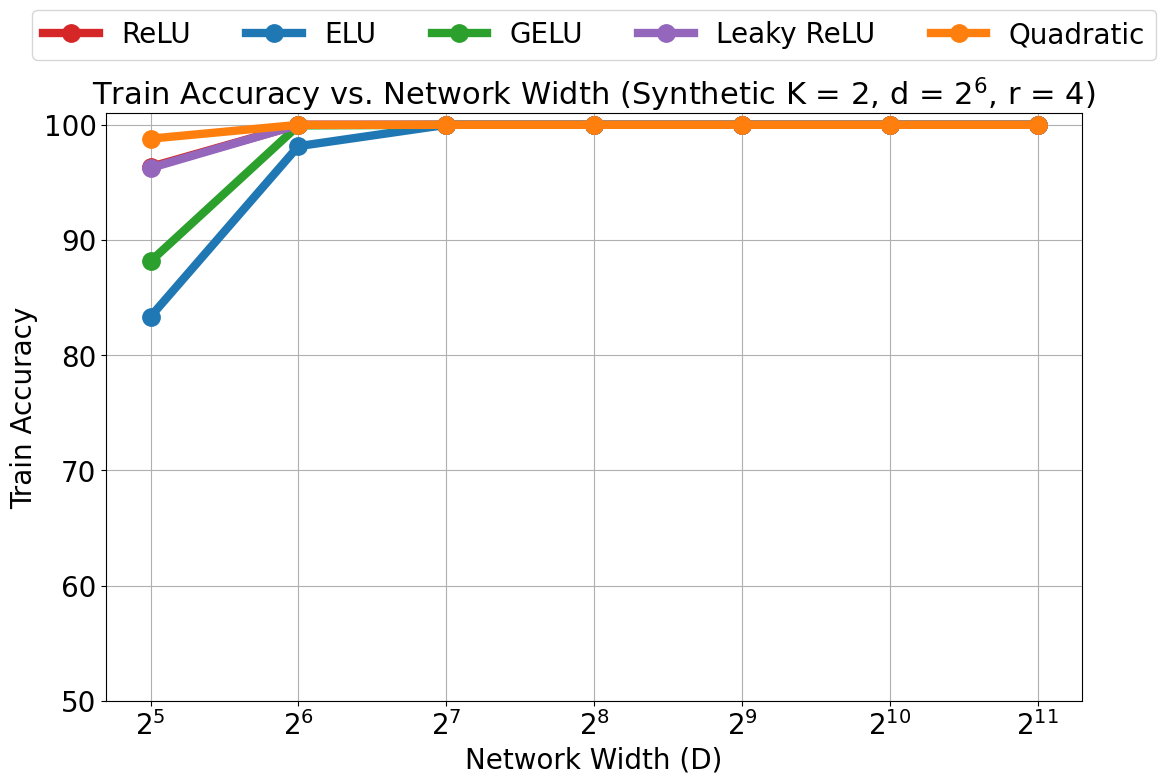

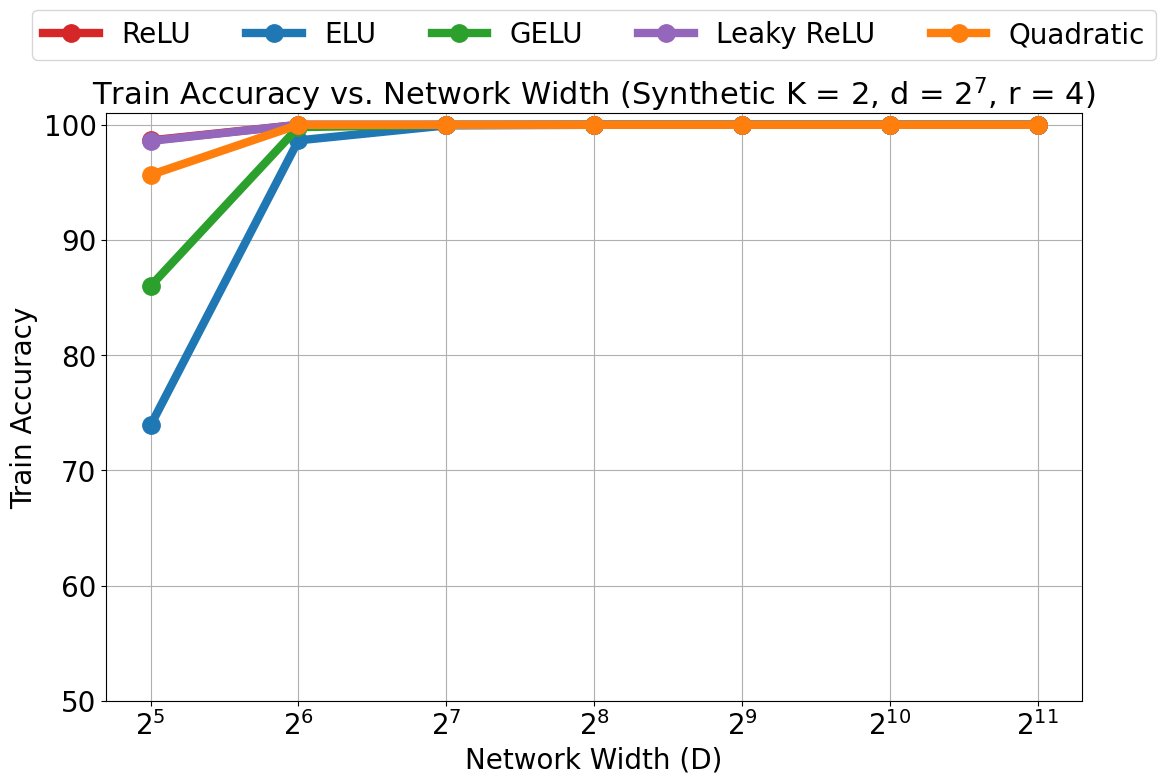

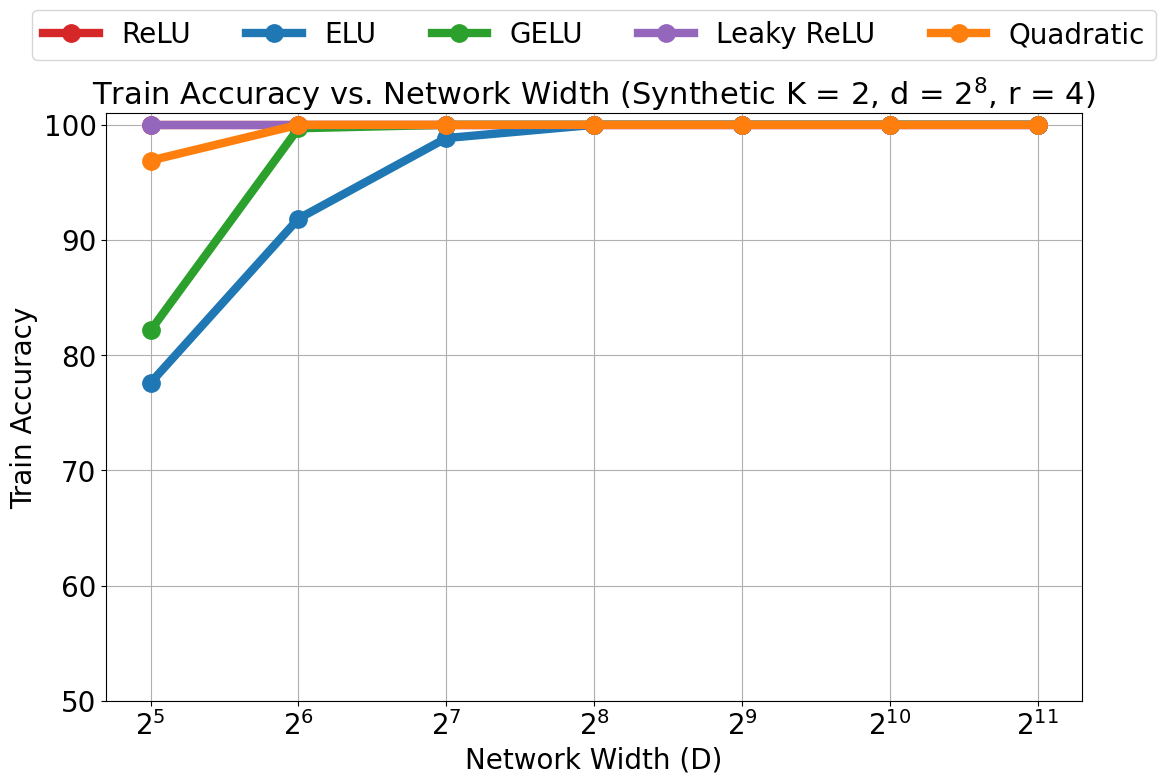

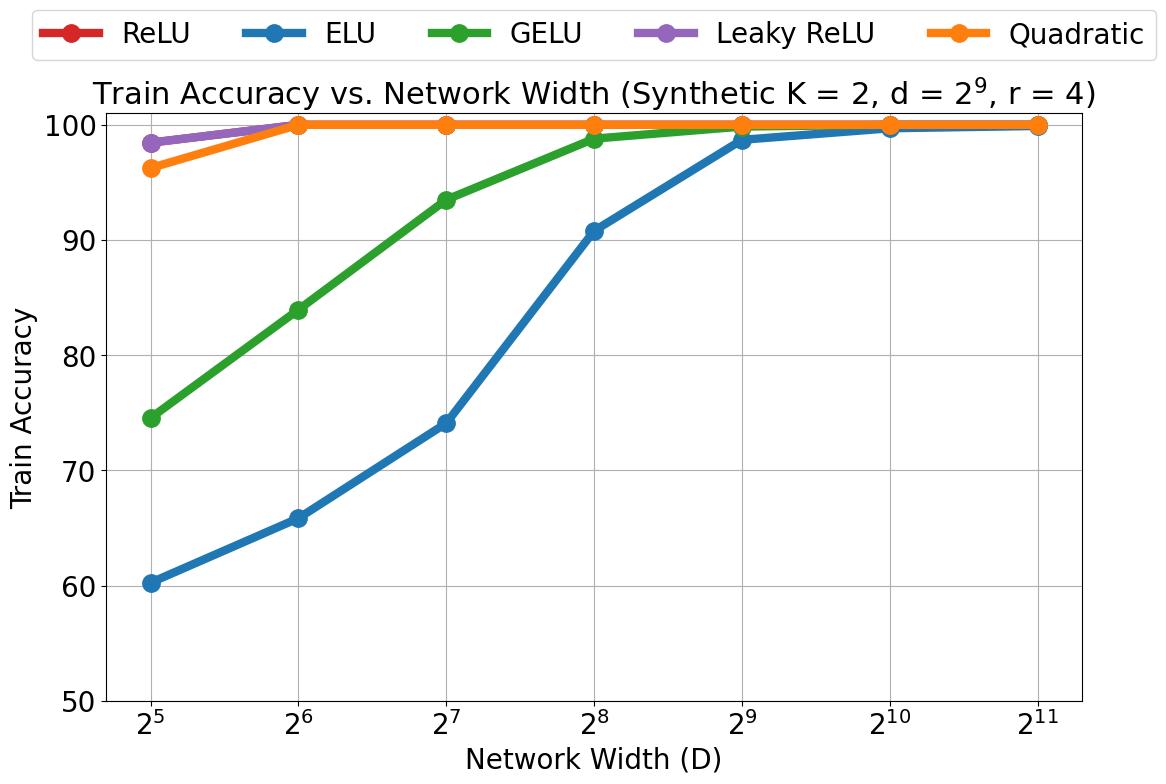

In [9]:
# Plot results
for (k, dim) in enumerate(dims):
    fig, ax1 = plt.subplots(figsize=(12,8))
    
    dim_base = int(np.log2(dim))
    dim_save = "$2^" + str(dim_base) + "$"
    
    start_idx = 1
    lw = 6
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 
    ax1.set_xlabel(r'Network Width (D)', fontsize=20)
    ax1.set_ylabel('Train Accuracy', fontsize=20)
    ax1.set_title('Train Accuracy vs. Network Width (Synthetic K = ' + str(K) + ', d = ' + dim_save + ', r = 4)', fontsize=22)

    lns = []
    for i in range(len(colors)):
        l_i = ax1.plot(widths, list(train_accs[k, :, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                      label=activations_save[activations[i]])
        lns += l_i

    ax1.set_xscale('log', base=2)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    #lns = l2+l3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=20)
    plt.grid()
    ax1.set_ylim(50, 101)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

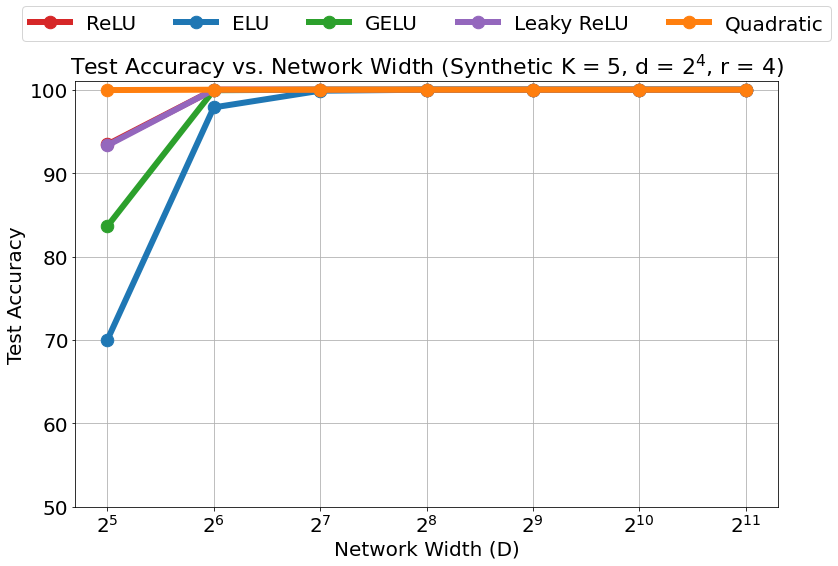

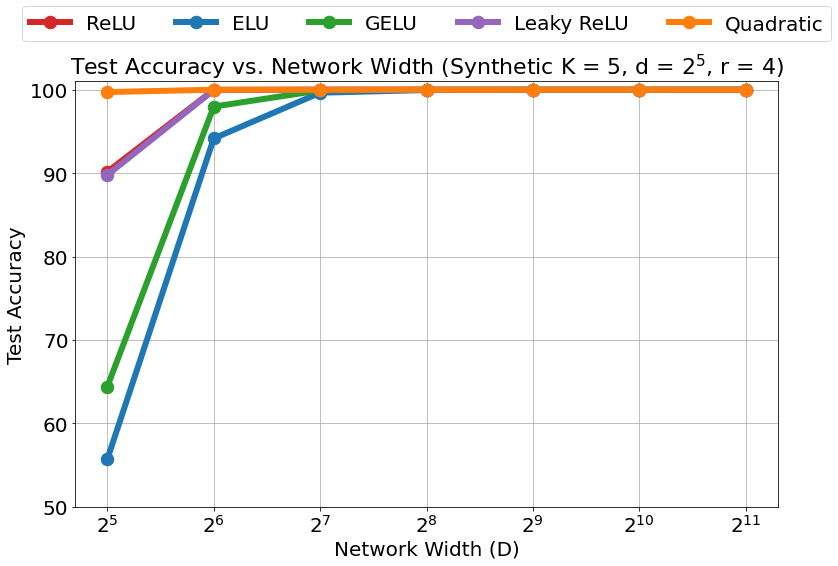

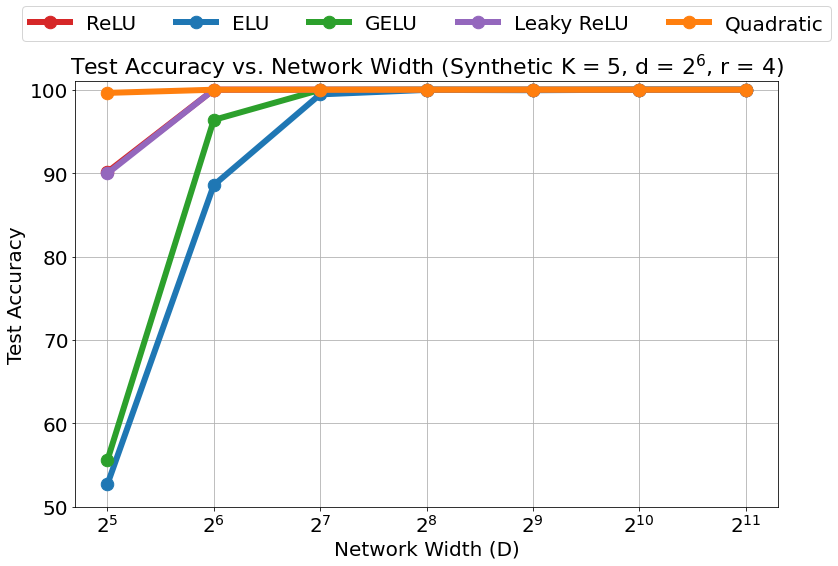

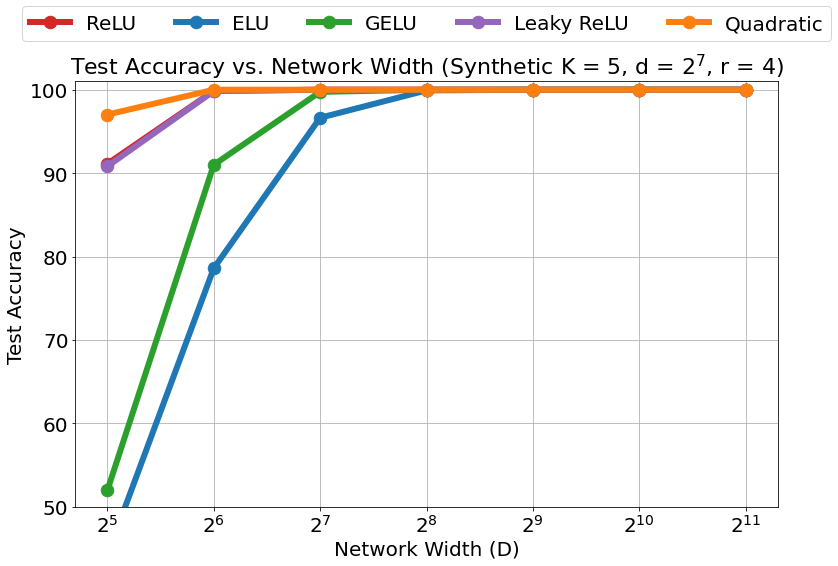

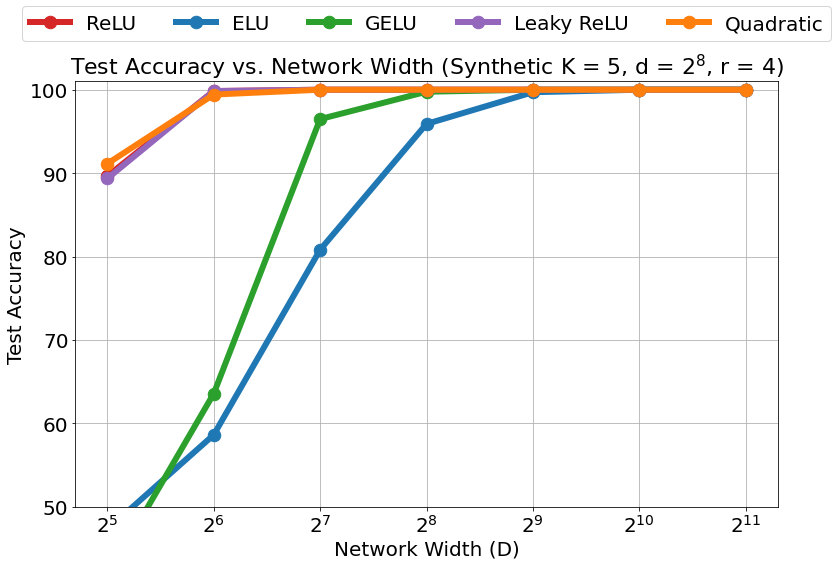

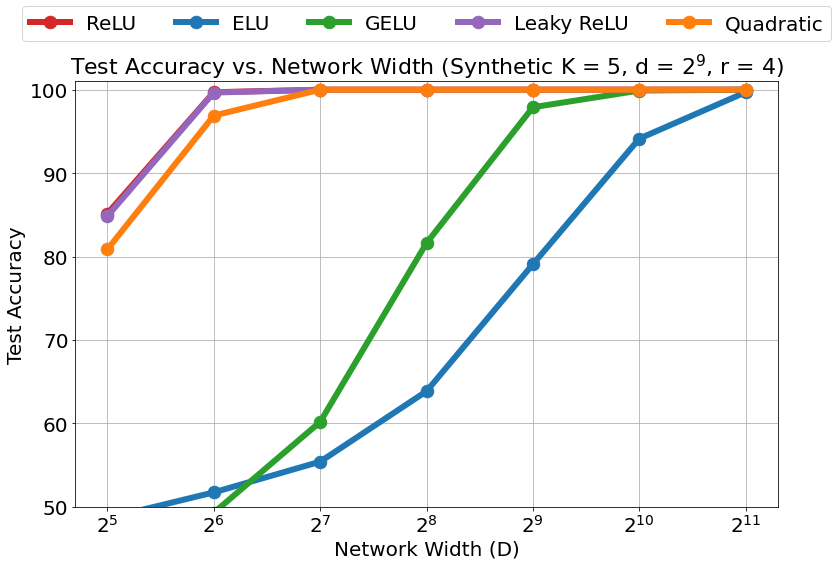

In [8]:
# Plot results
for (k, dim) in enumerate(dims):
    fig, ax1 = plt.subplots(figsize=(12,8))
    
    dim_base = int(np.log2(dim))
    dim_save = "$2^" + str(dim_base) + "$"
    
    start_idx = 1
    lw = 6
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 
    ax1.set_xlabel(r'Network Width (D)', fontsize=20)
    ax1.set_ylabel('Test Accuracy', fontsize=20)
    ax1.set_title('Test Accuracy vs. Network Width (Synthetic K = 5, d = ' + dim_save + ', r = 4)', fontsize=22)

    lns = []
    for i in range(len(activations)):
        l_i = ax1.plot(widths, list(test_accs[k, :, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                      label=activations_save[activations[i]])
        lns += l_i

    ax1.set_xscale('log', base=2)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    #lns = l2+l3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=20)
    plt.grid()
    ax1.set_ylim(50, 101)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [9]:
# Load in saved results
train_accs = np.zeros((len(ranks), len(widths), len(activations)))
test_accs = np.zeros((len(ranks), len(widths), len(activations)))

for (k, rank) in enumerate(ranks):
    for (i, width) in enumerate(widths):
        for (j, activation) in enumerate(activations):
            results_dir = "save/hybrid/ranks/width_" + str(width) + "_depth_2_nonlinear_depth_1_gaussian_init_uos_data_dim_128_5_classes_rank_" + str(rank) + "_angle_0_" + activation + "_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, "test.pth"), map_location=torch.device('cpu'))
        
            cur_train_accs = train_best_result['train_accuracies']
            train_accs[k, i, j] = cur_train_accs[-1]
        
            test_accs[k, i, j] = test_result['test_accuracy']

/tmp/ipykernel_2552596/1283402989.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xtick_labels)
/tmp/ipykernel_2552596/1283402989.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels)


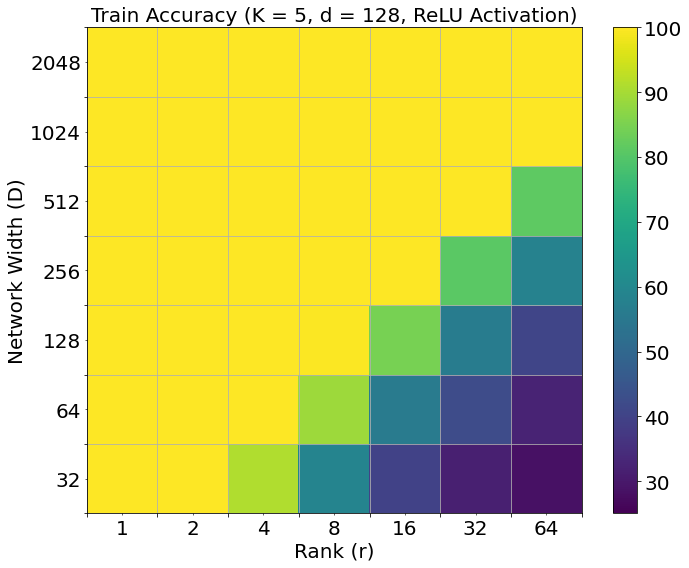

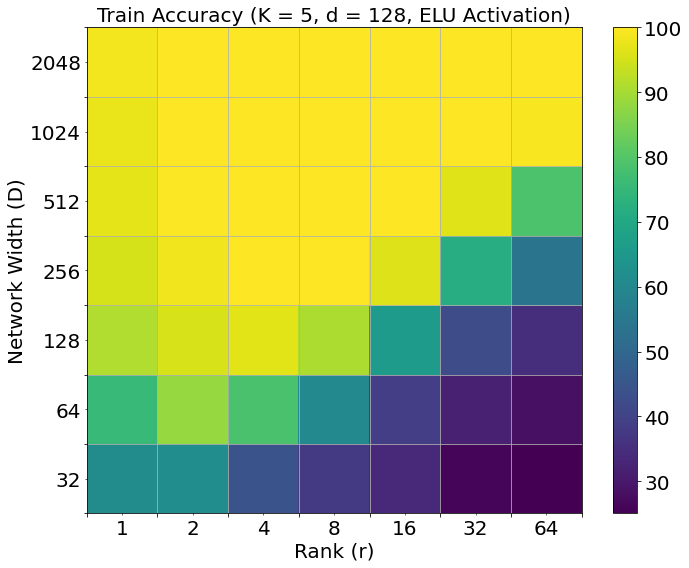

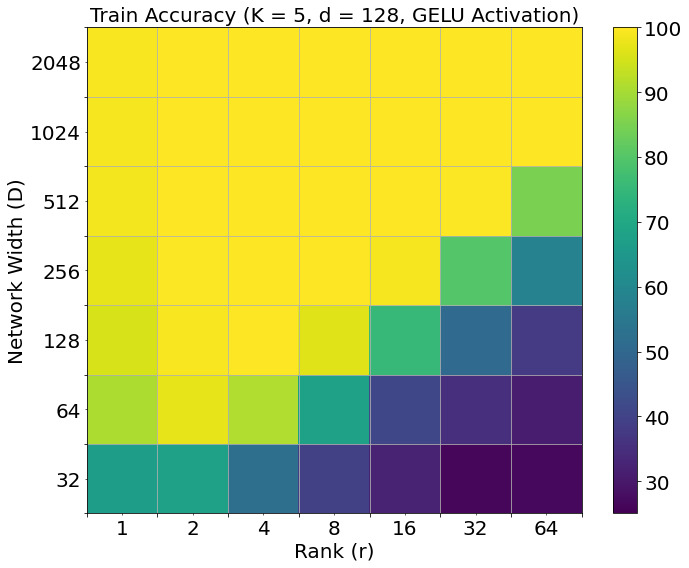

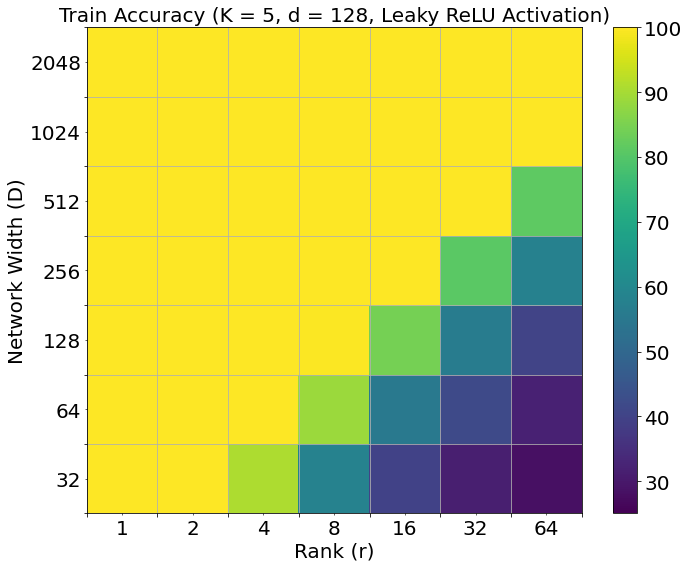

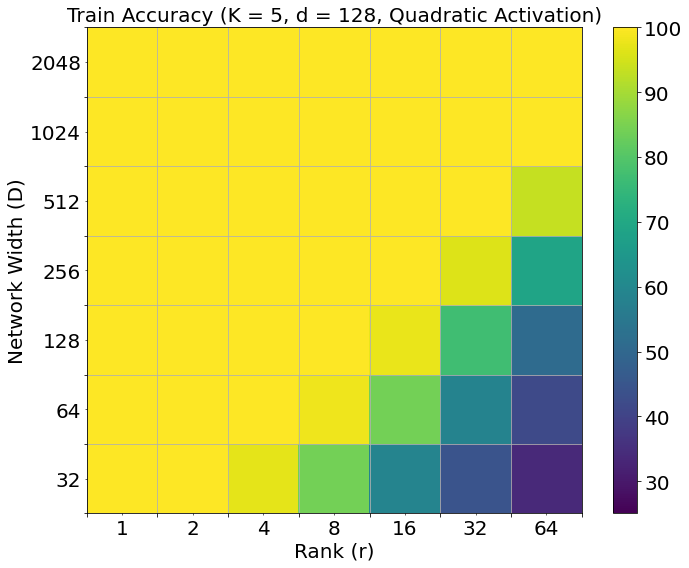

In [15]:
for (i, activation) in enumerate(activations):
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    start_idx = 1
    lw = 6
    ax1.set_xlabel(r'Rank (r)', fontsize=20)
    ax1.set_ylabel('Network Width (D)', fontsize=20)
    ax1.set_title('Train Accuracy (K = 5, d = 128, ' + activations_save[activation] + ' Activation)', fontsize=20)
    
    mesh = ax1.pcolor(train_accs[..., i].T, vmin=np.min(train_accs), vmax=np.max(train_accs))
    cbar = fig.colorbar(mesh)
    cbar.ax.tick_params(labelsize=20)
    
    xtick_labels = [str(rank) for rank in ranks]
    ax1.set_xticklabels(xtick_labels)
    ax1.xaxis.set_major_formatter(ticker.NullFormatter())
    ax1.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
    ax1.xaxis.set_minor_formatter(ticker.FixedFormatter(xtick_labels))
    
    ytick_labels = [str(width) for width in widths]
    ax1.set_yticklabels(ytick_labels)
    ax1.yaxis.set_major_formatter(ticker.NullFormatter())
    ax1.yaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
    ax1.yaxis.set_minor_formatter(ticker.FixedFormatter(ytick_labels))
    
    ax1.tick_params(which='minor', labelsize=20)
    
    plt.grid()
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

/tmp/ipykernel_2552596/2027556842.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xtick_labels)
/tmp/ipykernel_2552596/2027556842.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels)


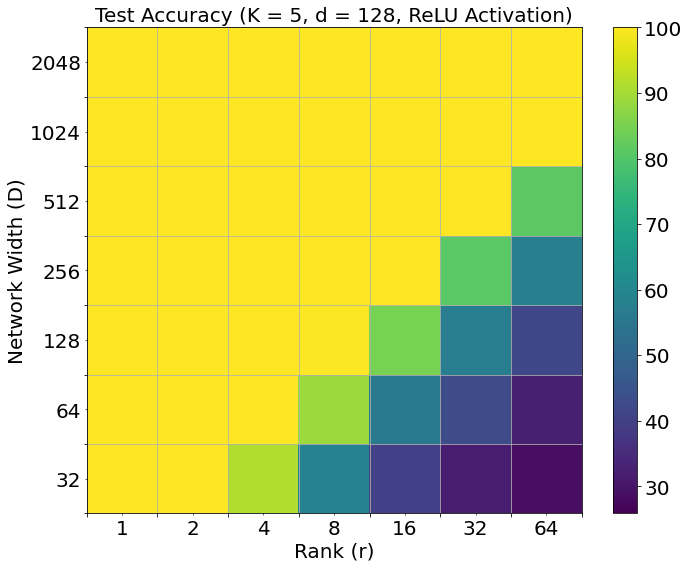

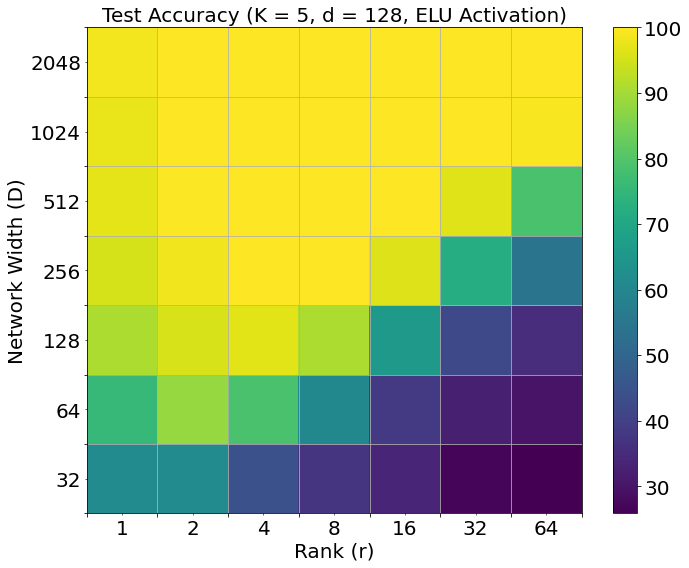

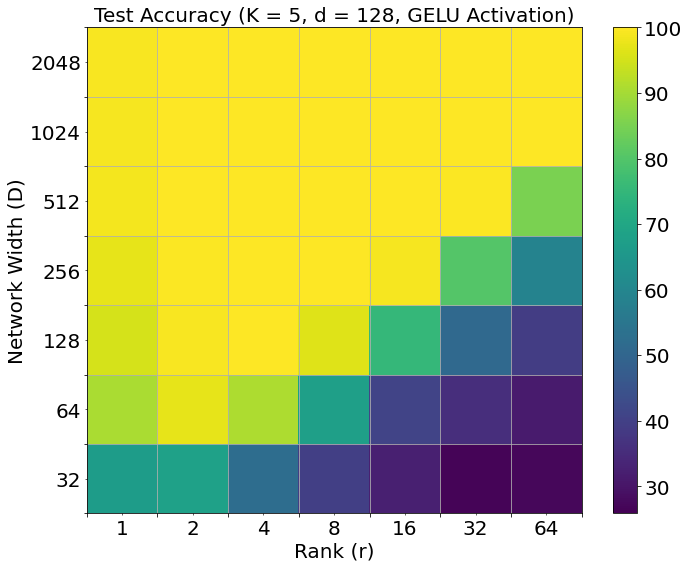

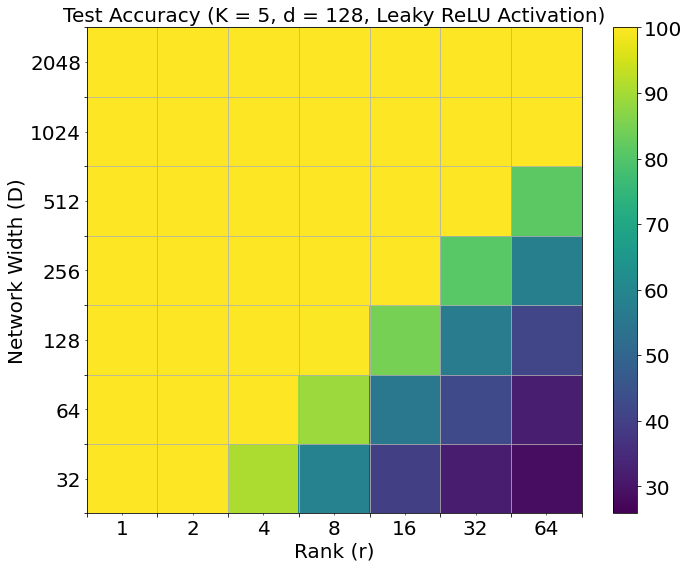

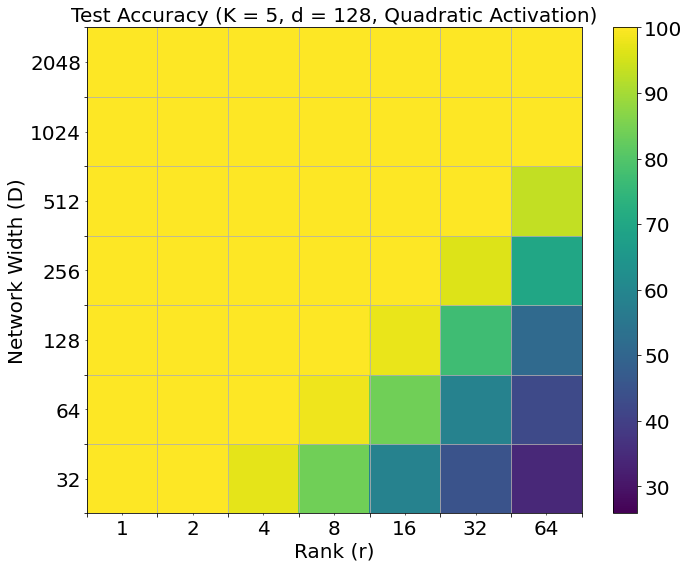

In [17]:
for (i, activation) in enumerate(activations):
    fig, ax1 = plt.subplots(figsize=(10,8))
    
    start_idx = 1
    lw = 6
    ax1.set_xlabel(r'Rank (r)', fontsize=20)
    ax1.set_ylabel('Network Width (D)', fontsize=20)
    ax1.set_title('Test Accuracy (K = 5, d = 128, ' + activations_save[activation] + ' Activation)', fontsize=20)
    
    mesh = ax1.pcolor(test_accs[..., i].T, vmin=np.min(test_accs), vmax=np.max(test_accs))
    cbar = fig.colorbar(mesh)
    cbar.ax.tick_params(labelsize=20)
    
    xtick_labels = [str(rank) for rank in ranks]
    ax1.set_xticklabels(xtick_labels)
    ax1.xaxis.set_major_formatter(ticker.NullFormatter())
    ax1.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
    ax1.xaxis.set_minor_formatter(ticker.FixedFormatter(xtick_labels))
    
    ytick_labels = [str(width) for width in widths]
    ax1.set_yticklabels(ytick_labels)
    ax1.yaxis.set_major_formatter(ticker.NullFormatter())
    ax1.yaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
    ax1.yaxis.set_minor_formatter(ticker.FixedFormatter(ytick_labels))
    
    ax1.tick_params(which='minor', labelsize=20)
    
    plt.grid()
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

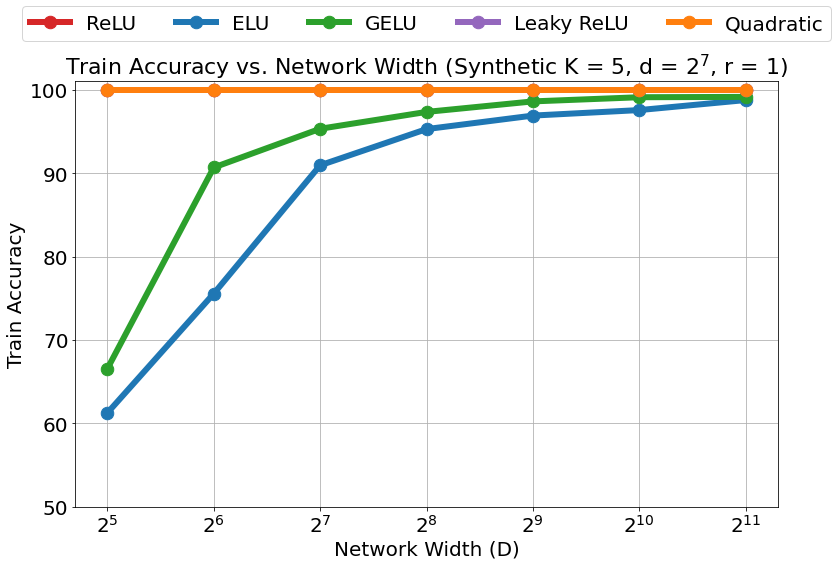

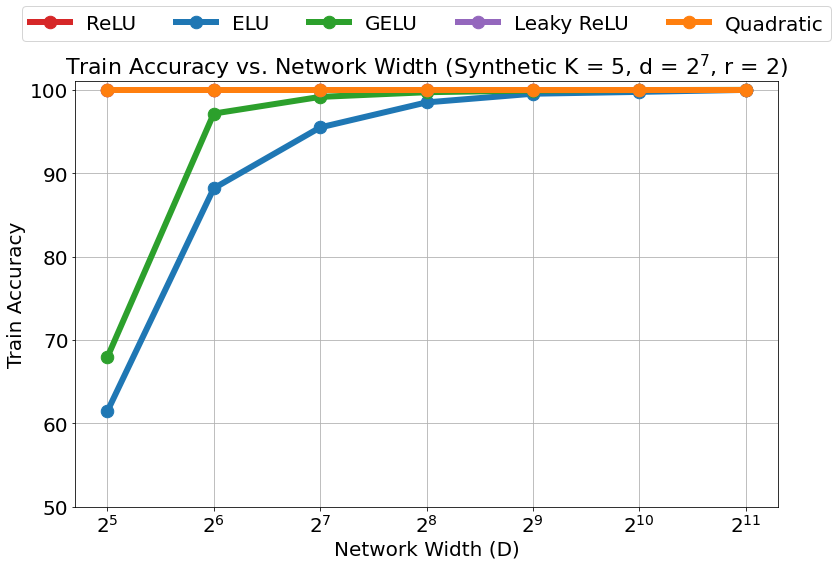

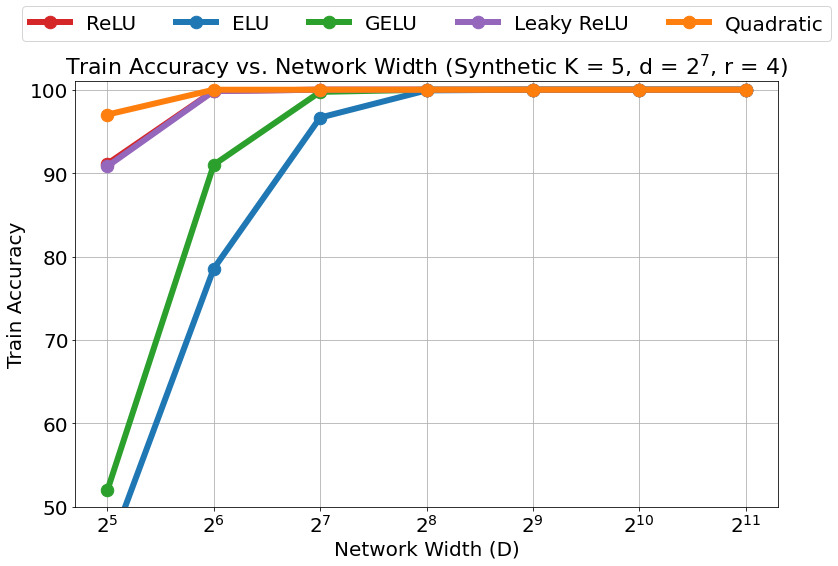

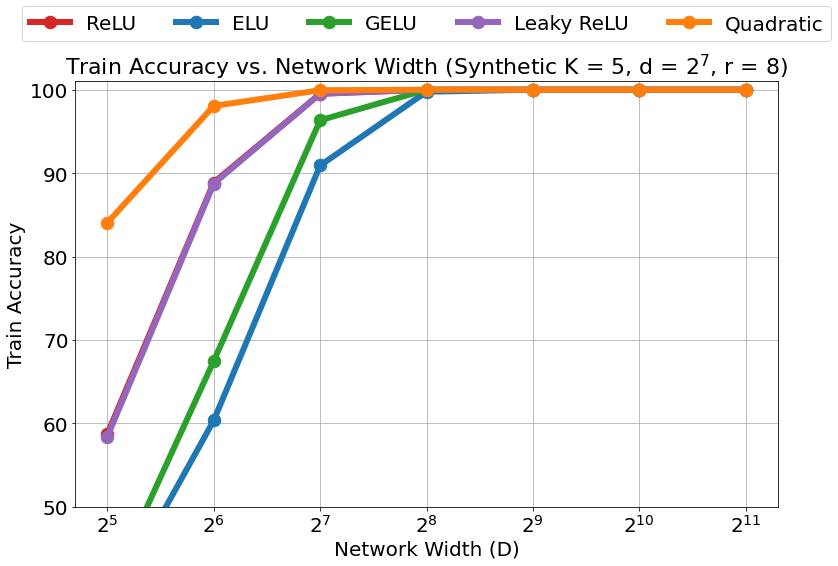

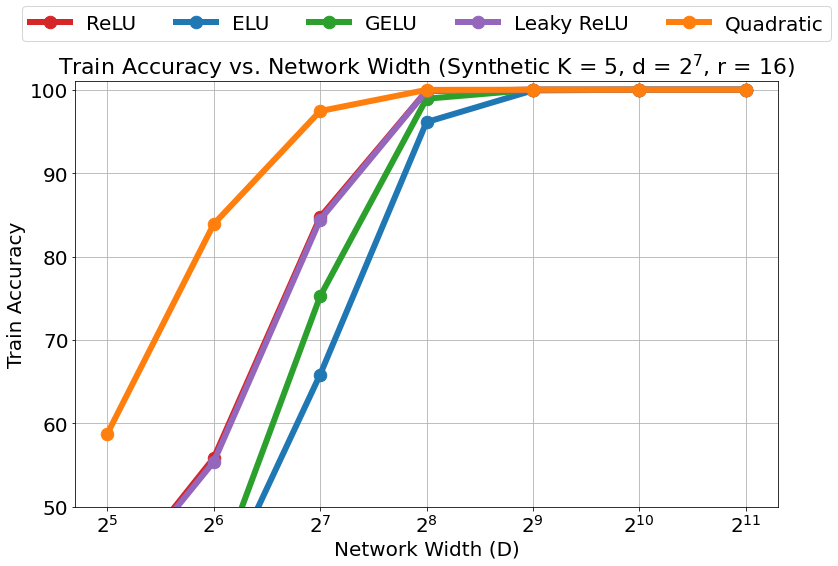

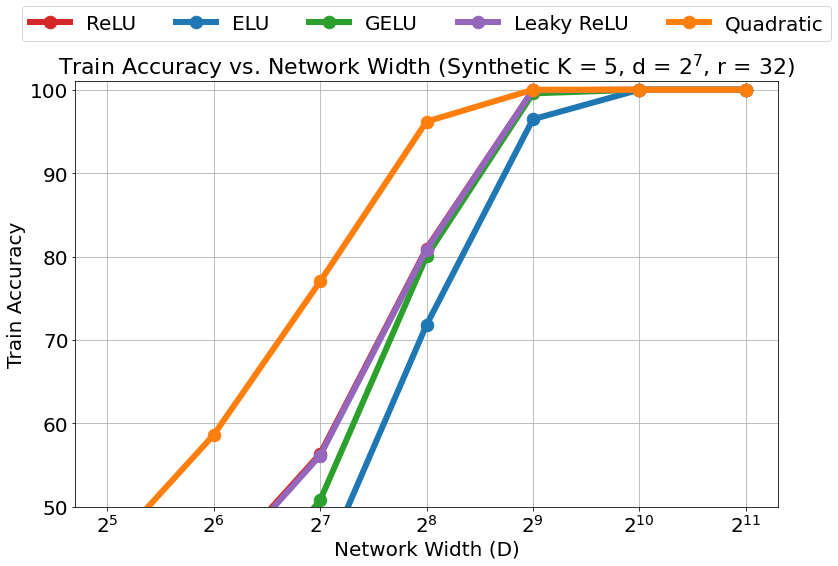

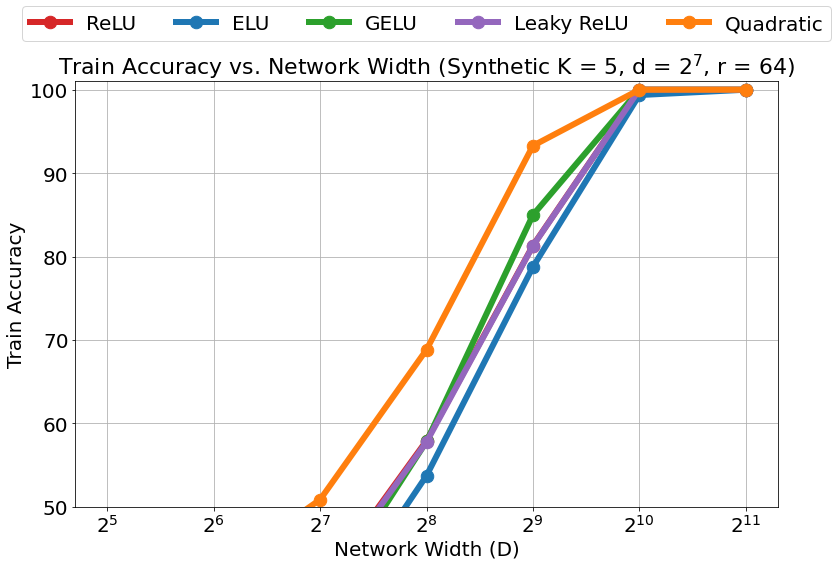

In [12]:
# Plot results
for (k, rank) in enumerate(ranks):
    fig, ax1 = plt.subplots(figsize=(12,8))
    
    #dim_base = int(np.log2(rank))
    #dim_save = "$2^" + str(dim_base) + "$"
    
    start_idx = 1
    lw = 6
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 
    ax1.set_xlabel(r'Network Width (D)', fontsize=20)
    ax1.set_ylabel('Train Accuracy', fontsize=20)
    ax1.set_title('Train Accuracy vs. Network Width (Synthetic K = 5, d = $2^7$, r = ' + str(rank) + ')', fontsize=22)

    lns = []
    for i in range(len(colors)):
        l_i = ax1.plot(widths, list(train_accs[k, :, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                      label=activations_save[activations[i]])
        lns += l_i

    ax1.set_xscale('log', base=2)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    #lns = l2+l3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=20)
    plt.grid()
    ax1.set_ylim(50, 101)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

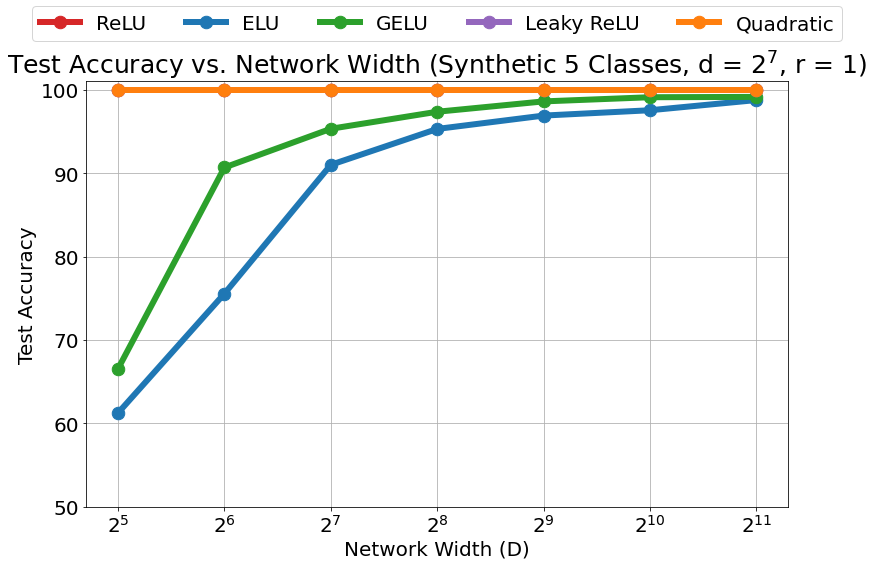

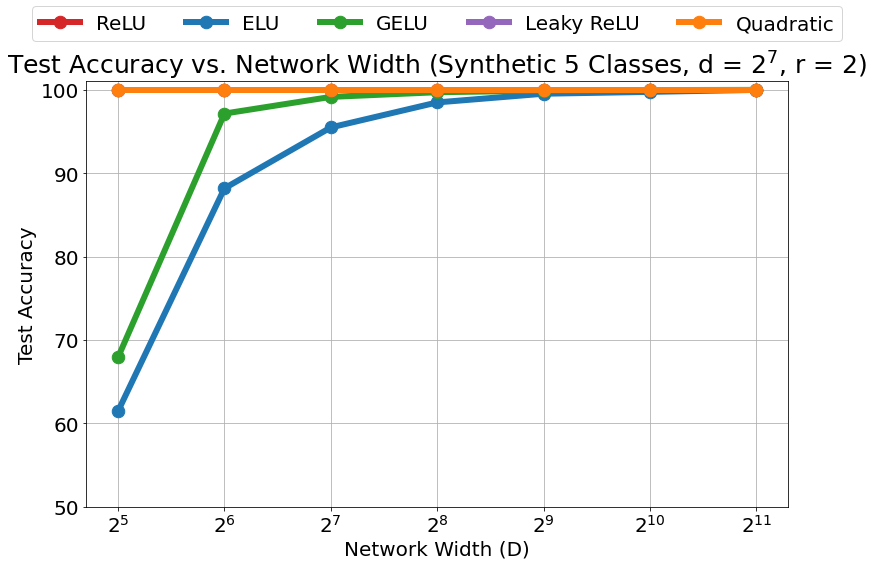

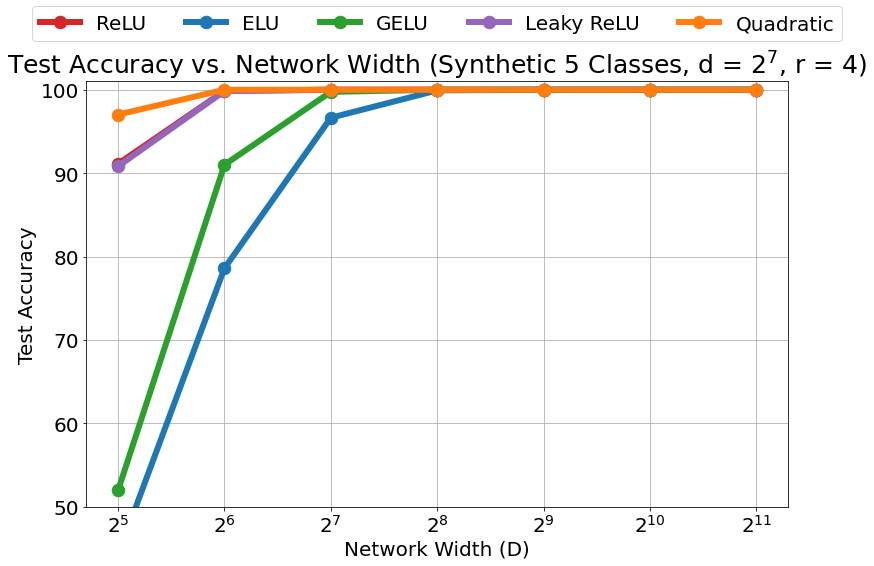

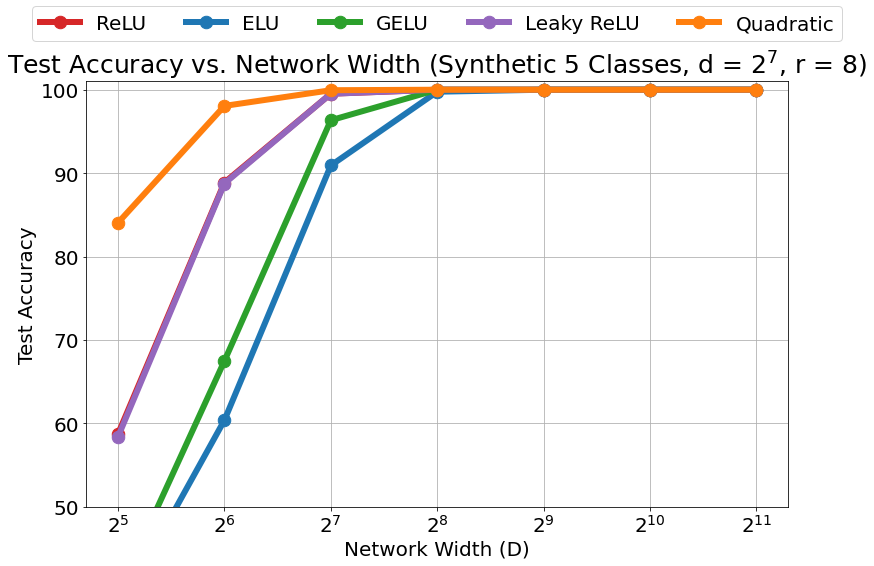

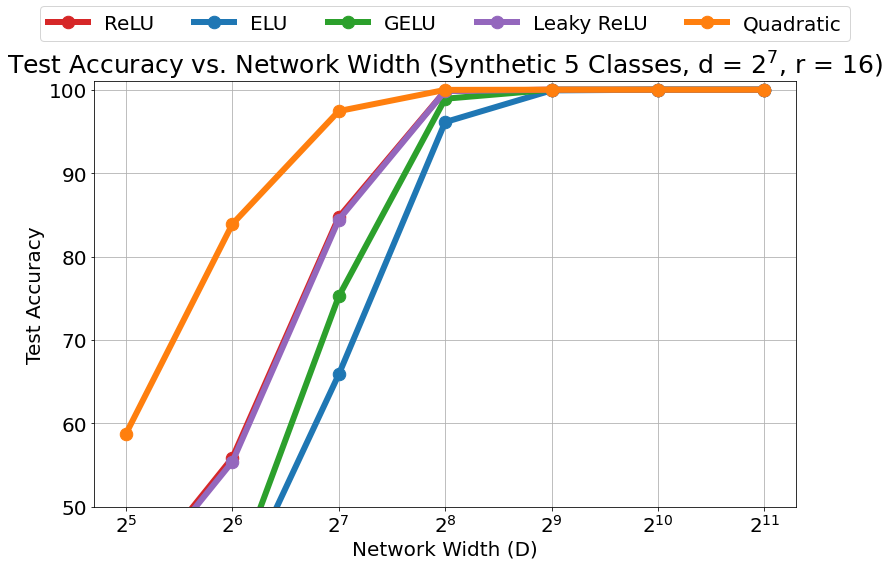

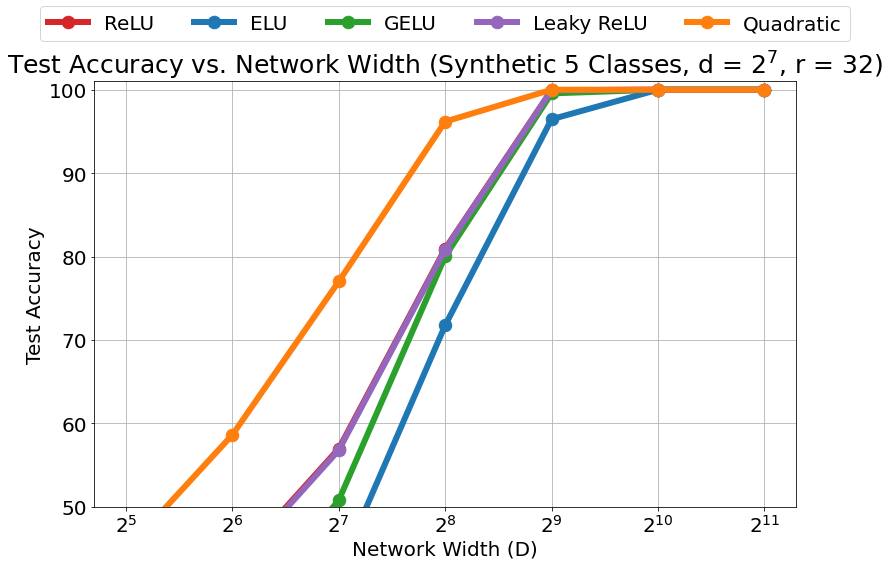

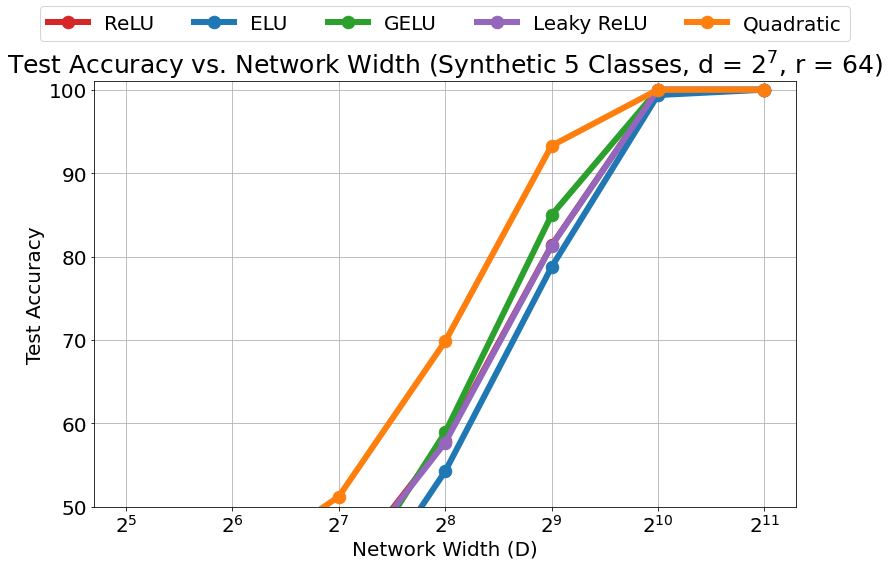

In [13]:
# Plot results
for (k, rank) in enumerate(ranks):
    fig, ax1 = plt.subplots(figsize=(12,8))
    
    start_idx = 1
    lw = 6
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 
    ax1.set_xlabel(r'Network Width (D)', fontsize=20)
    ax1.set_ylabel('Test Accuracy', fontsize=20)
    ax1.set_title('Test Accuracy vs. Network Width (Synthetic 5 Classes, d = $2^7$, r = ' + str(rank) + ')', fontsize=25)

    lns = []
    for i in range(len(activations)):
        l_i = ax1.plot(widths, list(test_accs[k, :, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                      label=activations_save[activations[i]])
        lns += l_i

    ax1.set_xscale('log', base=2)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    #lns = l2+l3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=20)
    plt.grid()
    ax1.set_ylim(50, 101)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()